# mp3 -> wav

### pydub 설정

In [38]:
from pydub import AudioSegment
from pydub.utils import mediainfo
from pathlib import Path
import os

# FFmpeg 경로 설정
# AudioSegment.ffmpeg = "./.venv/ffmpeg/bin/ffmpeg.exe"
AudioSegment.converter ="./.venv/ffmpeg/bin/ffmpeg.exe"
AudioSegment.ffprobe = "./.venv/ffmpeg/bin/ffprobe.exe"

In [39]:
def mp3_to_wav(mp3_file, wav_file):
    sound = AudioSegment.from_mp3(mp3_file)
    sound.export(wav_file, format="wav")

mp3_file = Path("./haeyo.mp3")
wav_file = "output_wav_file.wav"
mp3_to_wav(mp3_file, wav_file)

In [40]:
from scipy.io import wavfile

fname = "output_wav_file.wav"

fs, data = wavfile.read(fname) # Sample rate of wav file, Data read from wav file

In [41]:
data = data[:, 0]

In [42]:
import pandas as pd
df = pd.DataFrame(columns=["data"])
df['data'] = data
df

,data
0,0
1,0
2,0
3,0
4,0
...,...
10503163,0
10503164,0
10503165,0
10503166,0


In [46]:
import math
def pascal_to_db(pascal_value):
    reference_pressure = 20e-6
    if pascal_value == 0:
        return 0
    else:
        db_value = 20 * math.log10(abs(pascal_value) / reference_pressure)
    return db_value

df['data'] = df['data'].map(pascal_to_db)

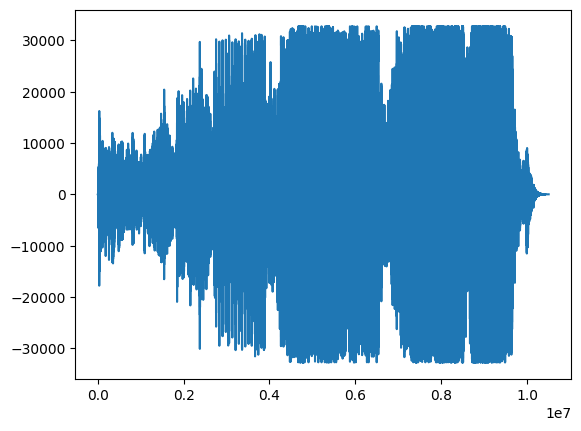

In [45]:
import matplotlib.pyplot as plt

plt.plot(data)

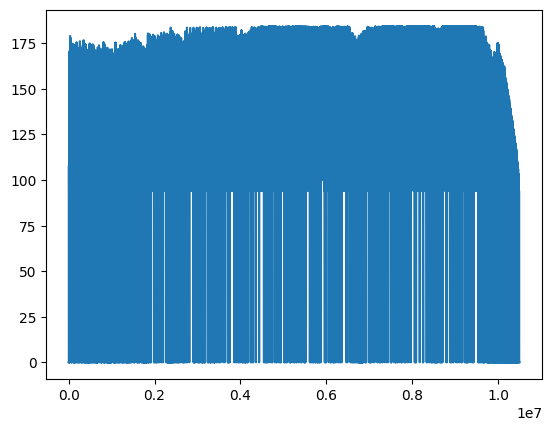

In [47]:
import matplotlib.pyplot as plt

plt.plot(df['data'])

In [ ]:
array = [[0, 0], [1, 1]]
first_elements = [sublist[0] for sublist in array]
print(first_elements)  # [0, 1]

# 배경음악 제거

In [5]:
from pydub import AudioSegment
from pydub.playback import play

myAudioFile = Path("./haeyo.mp3")
myAudioFile_CentersOut = "./remove_background.mp3"

# read in audio file and get the two mono tracks
sound_stereo = AudioSegment.from_file(myAudioFile, format="mp3")
sound_monoL = sound_stereo.split_to_mono()[0]
sound_monoR = sound_stereo.split_to_mono()[1]

# Invert phase of the Right audio file
sound_monoR_inv = sound_monoR.invert_phase()

# Merge two L and R_inv files, this cancels out the centers
sound_CentersOut = sound_monoL.overlay(sound_monoR_inv)
         
# Export merged audio file
fh = sound_CentersOut.export(myAudioFile_CentersOut, format="mp3")

# 푸리에 변환

In [ ]:
import Librosa

for wavFile in os.listdir(wavDir):
    if wavFile.endswith(".wav"):
        if wavFile.count(".") == 1: 
            jsonFile = wavFile.split('.')[0]
            jsonID = jsonFile
            print("Now processing with " + jsonFile, "(", nowprocess_num, "/", process_file_len, ")", "[ 경과시간:", time.time()-start_codetime, "]")
            jsonFile += '.json'